## 1) Problem statement.

**Data:** credit card  Data

**Problem statement :**
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.


**Approach:** The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

**Results:** You have to build a solution that should able to predict the probability of credit
default based on credit card owner’s characteristics and payment history.


## 2) Import required libraries



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import streamlit as st


In [3]:
# load data
data = pd.read_csv("C:\\Users\\prash\\Downloads\\creditcard\\credit_card\\creditcard.csv")

len(data)

284807

In [4]:
# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe()) 


(284807, 30)
               Class            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean        0.001727  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std         0.041527  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%         0.000000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%         0.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%         0.000000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max         1.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271

In [5]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print(f'Fraud Cases: {len(data[data['Class'] == 1])}')
print(f'Valid Transactions: {len(data[data['Class'] == 0])}') 


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.

In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("details of valid transaction") 
valid.Amount.describe() 


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Code : Plotting the Correlation Matrix
The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

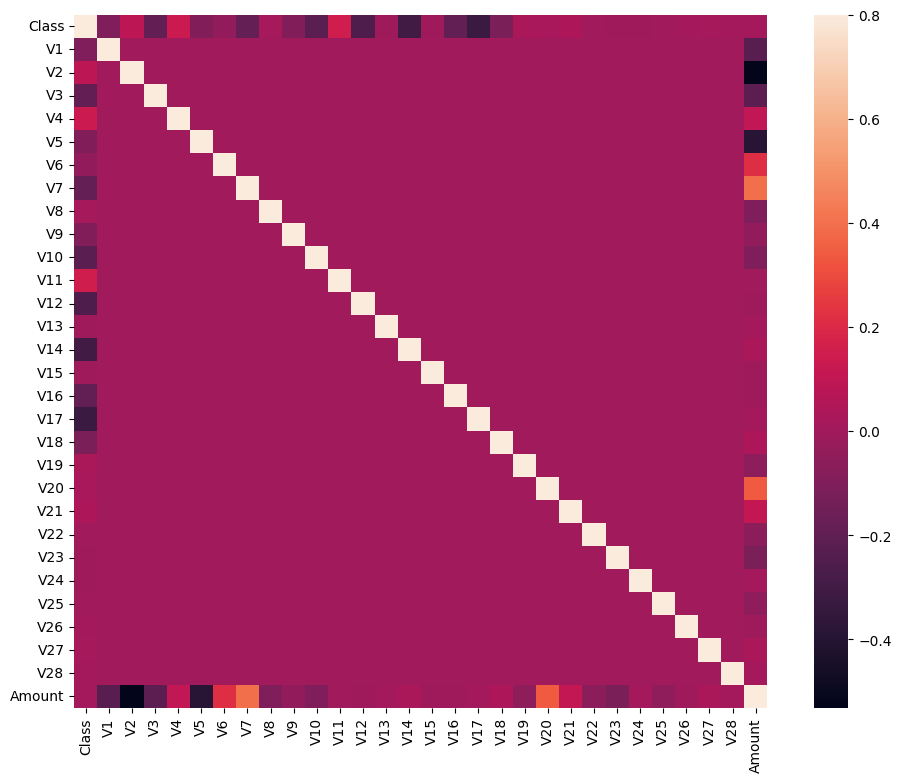

In [8]:
# Correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 


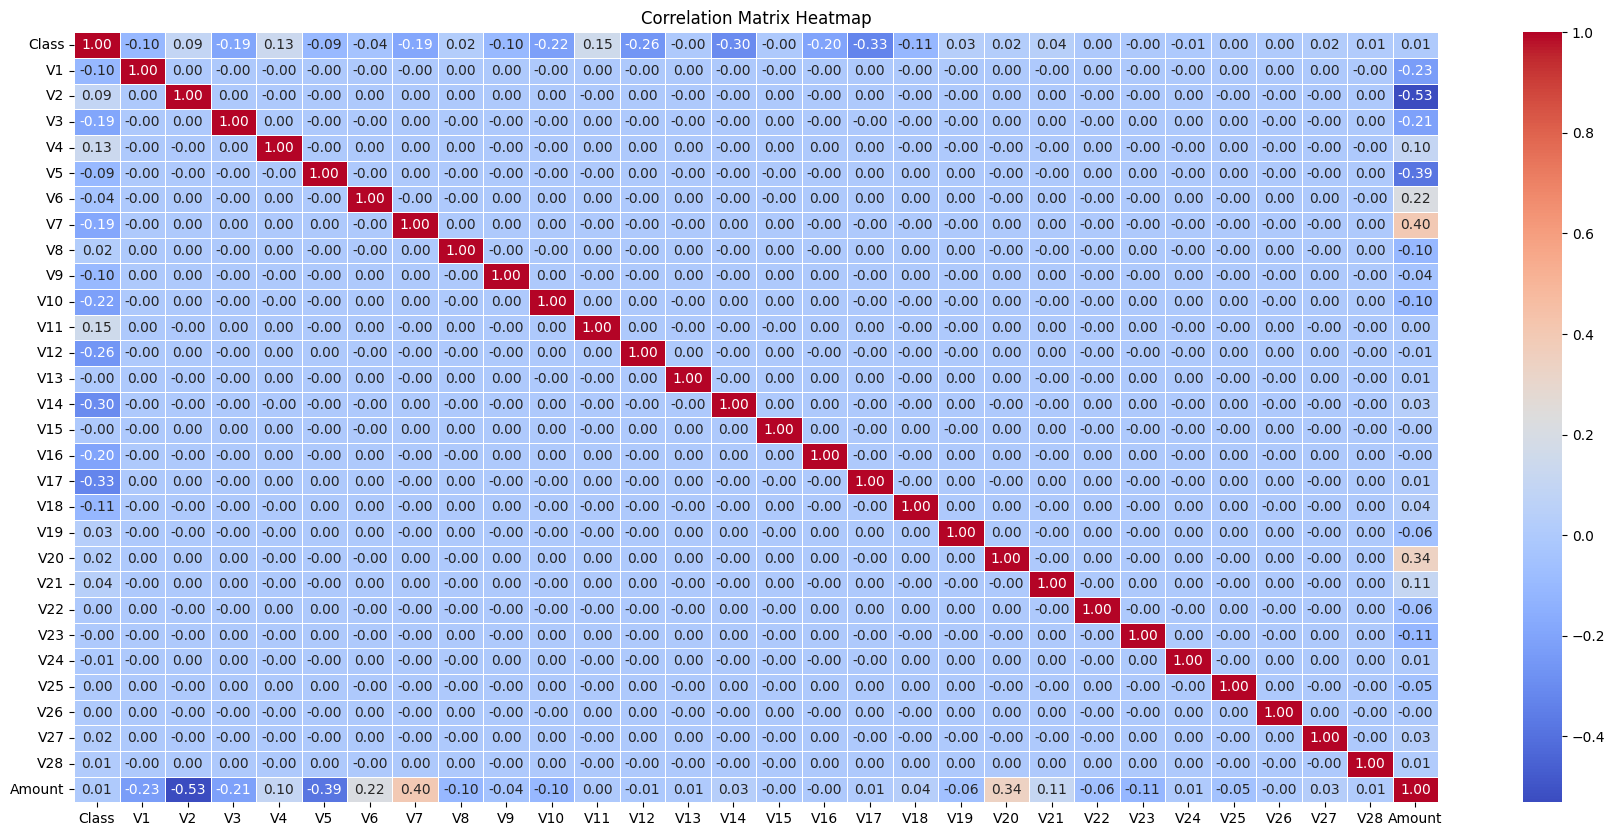

In [9]:
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(22, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [10]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 


(284807, 29)
(284807,)


In [11]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 


(284807, 29)
(284807,)


In [12]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
		xData, yData, test_size = 0.2, random_state = 42) 


In [13]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 


In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef




acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The accuracy is 0.9995435553526912
The precision is 0.9736842105263158
The recall is 0.7551020408163265
The F1-Score is 0.8505747126436782
The Matthews correlation coefficient is0.8572503300661733


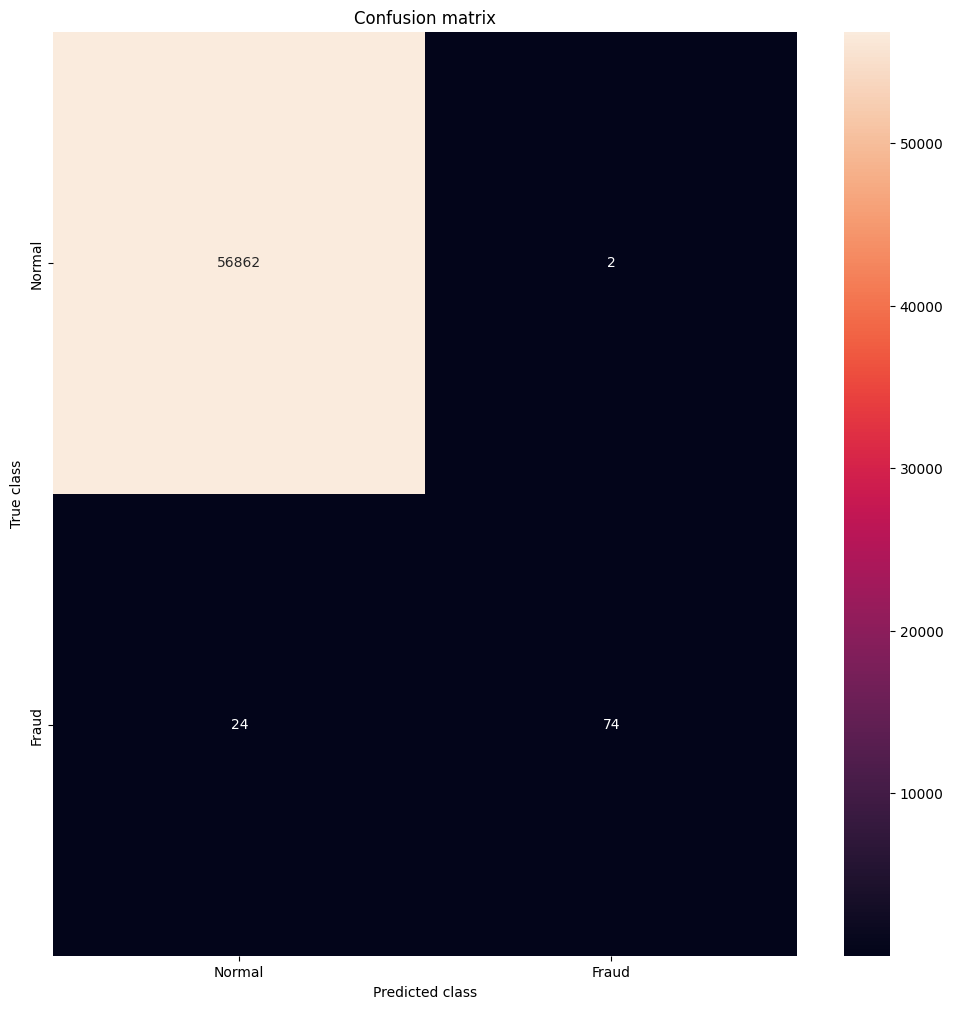

In [15]:
# printing the confusion matrix 
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
			yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


NameError: name 'legit' is not defined

In [17]:
X = data.drop(columns="Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [107]:
# create Streamlit app
st.title("credit card fault detection model")
st.write("enter the following features to check if data is legitimate")



In [108]:
# create input fields for user to enter feature values

input_df=st.text_input('input all features')
input_df_lst=input_df.split(',')

#create a button to submit an d get prediction
submit=st.button('Submit')

if submit:
    features=np.array(input_df_lst,dtype=np.float)
    prediction=rfc.predict(features.reshape(1,-1))
    if prediction[0]==0:
        st.write("legitimate transaction")
    else:
        st.write("Frauduelent Transaction")

